# Experiemento Rafael


In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [41]:
## leitura e Tratamento dos dados
df_original = pd.read_csv("../../data/dados_extraidos.csv")

In [42]:
## carrega os dados
df = df_original.copy()

In [43]:
## pre-processamento 1 - fillna with median
# Calculo das médias do df 
medians = df.median()
# Fill NaN values with medians
df = df.fillna(medians)

display(df.head())

timestamp  vol1ex1_qx  vol1ex1_qy  vol1ex1_qz  vol1ex1_jx  vol1ex1_jy  \
0     0.0000     0.71875    102.9769    91.90424    186.9064    86.05160   
1     0.0334     0.71875    102.9769    91.90424    186.9064    86.05160   
2     0.0668    -0.25000    102.9769    91.90424    186.9064    86.24536   
3     0.1002    -0.25000    102.9769    91.90424    186.9064    85.88944   
4     0.1336     0.40625    102.9769    91.90424    186.9064    85.88944   

   vol1ex1_jz  vol1ex2_qx  vol1ex2_qy  vol1ex2_qz  ...  vol7ex4_qz  \
0    198.7182     0.71875    101.1554    100.2091  ...    308.6826   
1    198.7182     2.71875    101.1554    100.2091  ...    308.6826   
2    198.8709     2.71875    101.1554    100.2091  ...    308.6826   
3    199.3856     2.71875    101.1554    100.2091  ...    308.6826   
4    199.3856     2.50000    101.1554    100.2091  ...    308.6826   

   vol7ex4_jx  vol7ex4_jy  vol7ex4_jz  vol7ex5_qx  vol7ex5_qy  vol7ex5_qz  \
0    277.2512    219.5107    316.9044    -47.8125    131.6766    283.0572   
1    277.2512    219.5107    316.9044    -47.8125    128.9778    278.6195   
2    277.2512    219.5107    316.9044    -47.8125    128.9778    278.6195   
3    277.2512    219.5107    316.9044    -47.8125    128.8790    278.7604   
4    277.2512    219.5107    316.9044    -47.8125    128.8790    278.7604   

   vol7ex5_jx  vol7ex5_jy  vol7ex5_jz  
0    264.6223    219.5107    316.9044  
1    263.2088    219.5107    316.9044  
2    263.2088    219.5107    316.9044  
3    263.1512    219.5107    316.9044  
4    263.1512    219.5107    316.9044  

[5 rows x 211 columns]

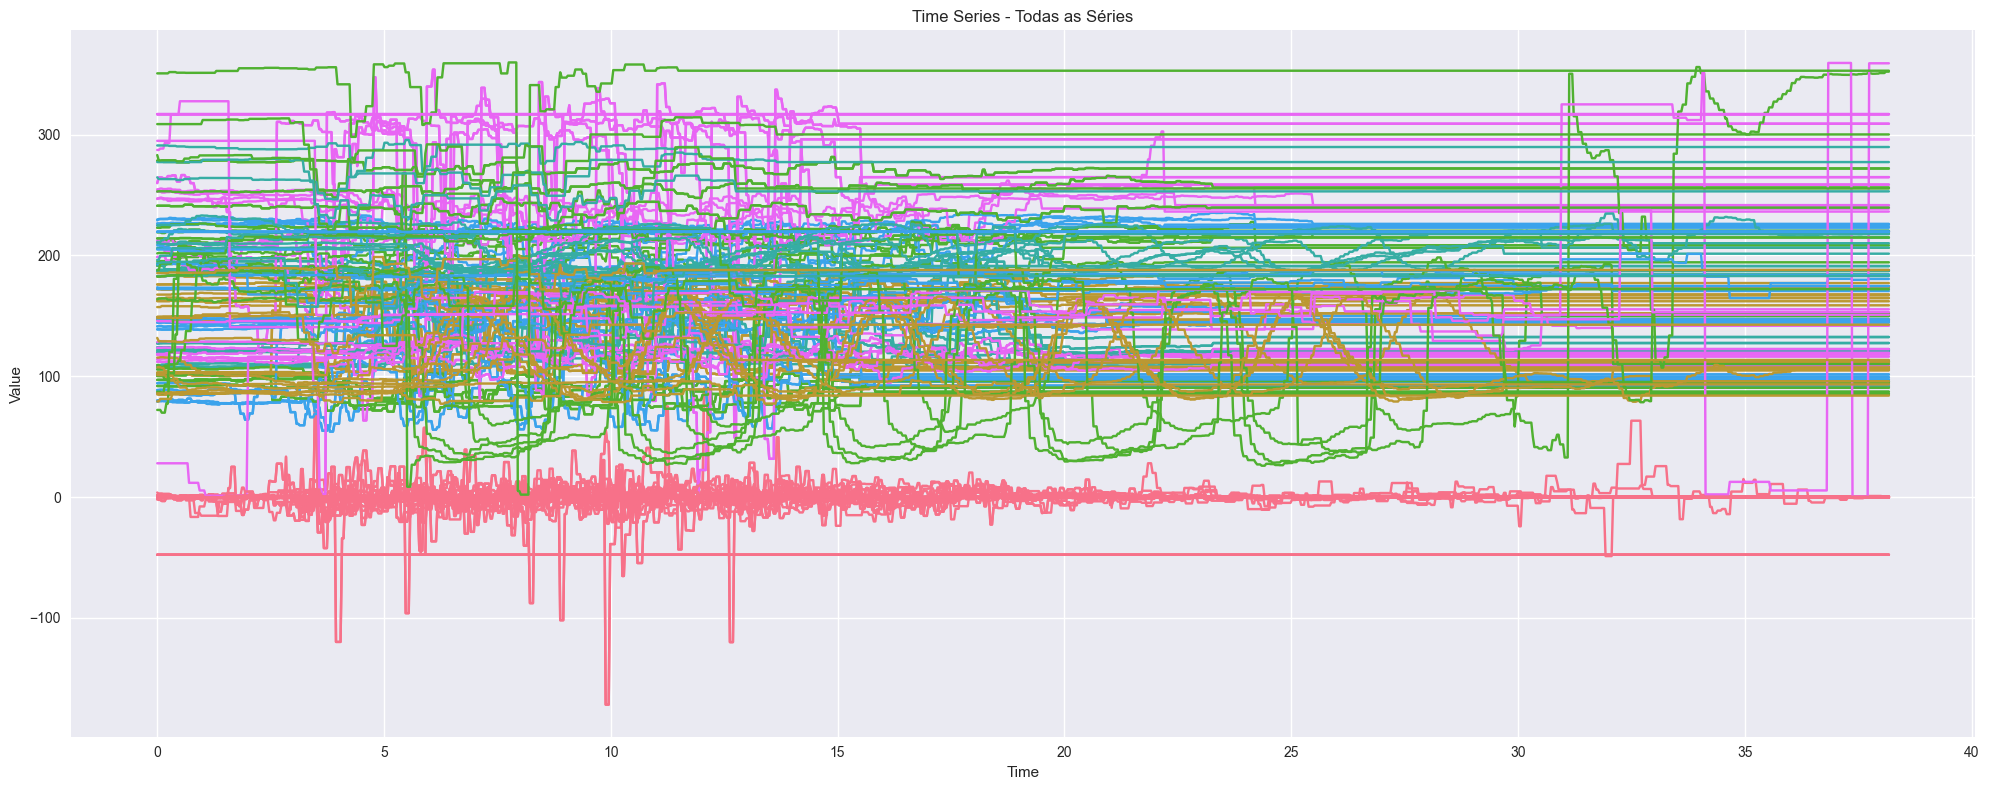

In [44]:
# visualização das séries pós processamento dos dados
plt.figure(figsize=(20, 8))

for col in df.columns[1:]:
    # Ensure the data is numeric before plotting
    df[col] = pd.to_numeric(df[col], errors='coerce')
    plt.plot(df.iloc[:,0], df[col], label=col)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Todas as Séries')
# plt.legend() # Remove legend
plt.grid(True)
plt.tight_layout()
plt.show() 

In [45]:
"""
suavização de cada série com média móvel
suavização de cada série com Locally Estimated Scatterplot Smoothing - LOESS (https://pypi.org/project/loess/)
"""



'\nsuavização de cada série com média móvel\nsuavização de cada série com Locally Estimated Scatterplot Smoothing - LOESS (https://pypi.org/project/loess/)\n'

In [46]:
# Parâmetro da média móvel (quantos pontos considerar)
window_size = 5  # ajuste conforme necessário

# Copiar DataFrame original para não sobrescrever
df_smoothed = df.copy()

# Aplicar média móvel a todas as colunas, exceto timestamp
series_cols = [col for col in df.columns if col != 'timestamp']

df_smoothed[series_cols] = (
    df[series_cols]
    .rolling(window=window_size, center=True, min_periods=1)
    .mean()
)

# Visualizar as primeiras linhas
df_smoothed.head()


timestamp  vol1ex1_qx  vol1ex1_qy  vol1ex1_qz  vol1ex1_jx  vol1ex1_jy  \
0     0.0000    0.395833   102.97690   91.904240   186.90640   86.116187   
1     0.0334    0.234375   102.97690   91.904240   186.90640   86.059500   
2     0.0668    0.268750   102.97690   91.904240   186.90640   86.025488   
3     0.1002    0.206250   103.04334   91.840112   186.82828   85.993056   
4     0.1336    0.143750   103.10978   91.775984   186.75016   85.968300   

   vol1ex1_jz  vol1ex2_qx  vol1ex2_qy  vol1ex2_qz  ...  vol7ex4_qz  \
0  198.769100    2.052083    101.1554  100.209100  ...    308.6826   
1  198.923225    2.218750    101.1554  100.209100  ...    308.6826   
2  199.015700    2.275000    101.1554  100.209100  ...    308.6826   
3  199.149180    2.631250    101.1734   99.627808  ...    308.6826   
4  198.539560    2.587500    101.1914   99.046516  ...    308.6826   

   vol7ex4_jx  vol7ex4_jy  vol7ex4_jz  vol7ex5_qx  vol7ex5_qy  vol7ex5_qz  \
0    277.2512    219.5107    316.9044    -47.8125   129.87740  280.098733   
1    277.2512    219.5107    316.9044    -47.8125   129.62780  279.764150   
2    277.2512    219.5107    316.9044    -47.8125   129.47804  279.563400   
3    277.2512    219.5107    316.9044    -47.8125   128.91852  278.704040   
4    277.2512    219.5107    316.9044    -47.8125   128.89876  278.732220   

   vol7ex5_jx  vol7ex5_jy  vol7ex5_jz  
0  263.679967    219.5107    316.9044  
1  263.547775    219.5107    316.9044  
2  263.468460    219.5107    316.9044  
3  263.174240    219.5107    316.9044  
4  263.162720    219.5107    316.9044  

[5 rows x 211 columns]

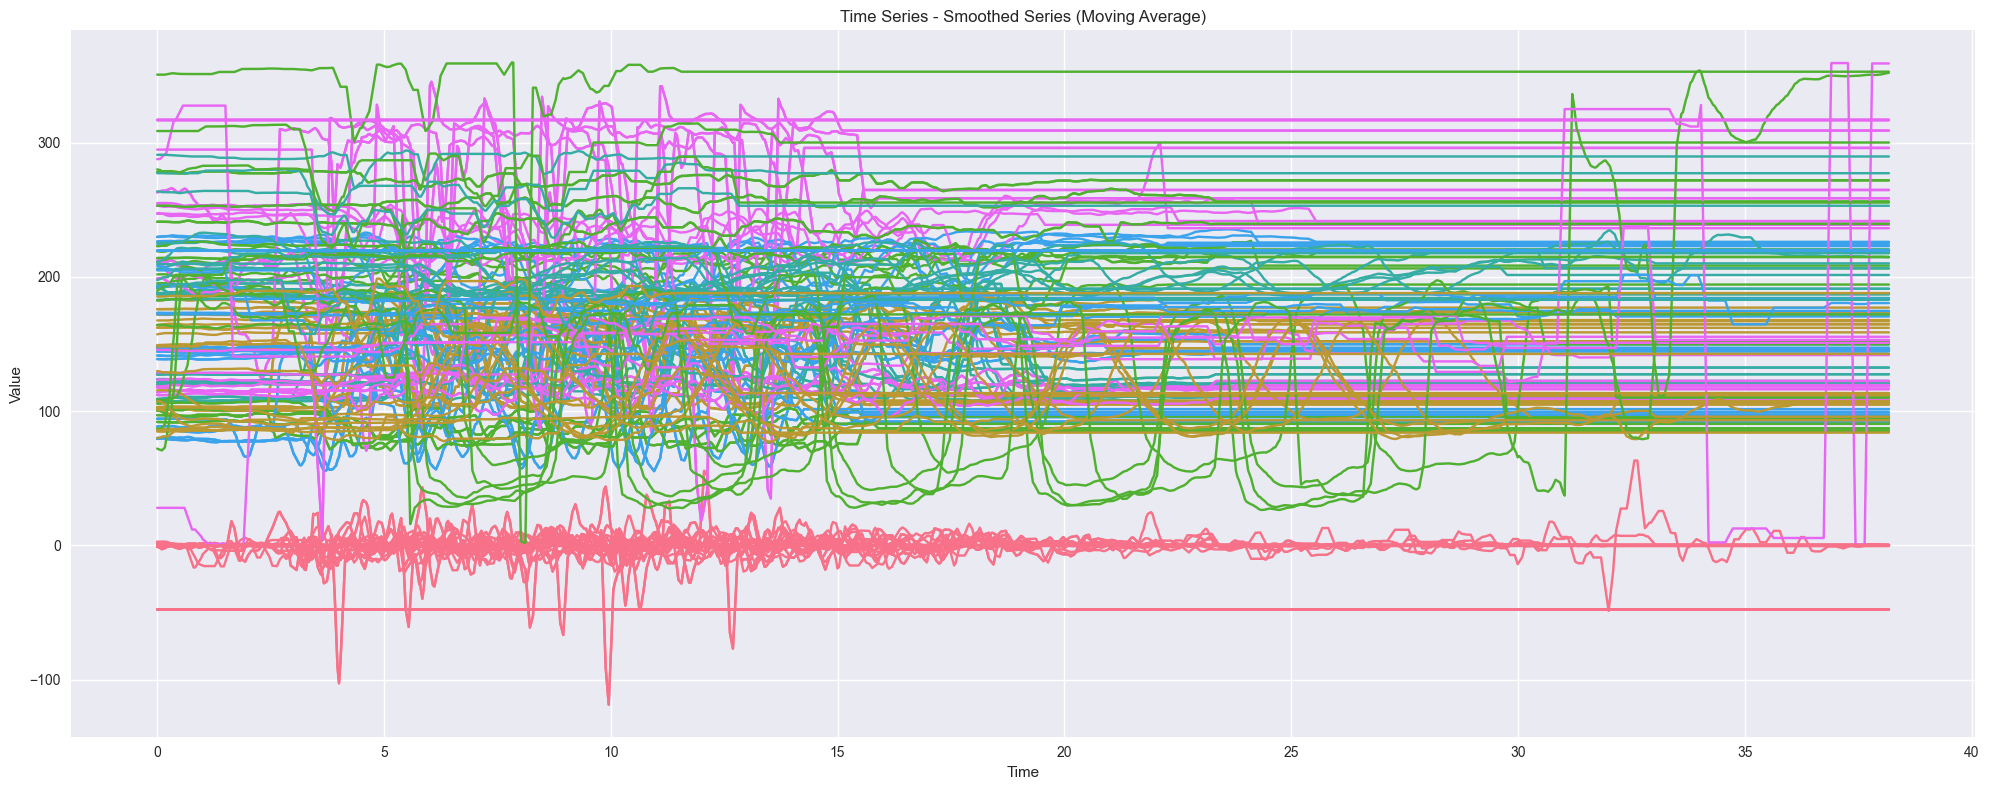

In [47]:
## visualização das séries suavizadas com média móvel
plt.figure(figsize=(20, 8))

# Select all columns except 'timestamp' from the smoothed DataFrame
smoothed_columns_to_plot = [col for col in df_smoothed.columns if col != 'timestamp']

for col in smoothed_columns_to_plot:
    plt.plot(df_smoothed['timestamp'], df_smoothed[col], label=col)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Smoothed Series (Moving Average)')
# plt.legend() # Uncomment to show legend if needed
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from loess.loess_1d import loess_1d
import logging

# Configurar logging básico
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

# Parâmetros do LOESS
frac = 0.1    # Fração de pontos para cada ajuste local (0.1 a 1.0)
degree = 1    # Grau do polinômio
npoints = None  # Número de pontos (None = automático)

# Lista de colunas originais (exceto timestamp)
original_cols = [col for col in df.columns if col != 'timestamp']

# Pré-alocar dicionário de resultados
smoothed_data = {'timestamp': df['timestamp']}
x_values = np.arange(len(df), dtype=float)

for i, col in enumerate(original_cols):
    try:
        y_values = df[col].values.astype(float)
        
        if np.isnan(y_values).all():
            smoothed_data[col + '_smoothed_loess'] = y_values
            continue
        
        valid_mask = ~np.isnan(y_values)
        n_valid = np.sum(valid_mask)

        if n_valid < 3:
            smoothed_data[col + '_smoothed_loess'] = y_values
            continue

        min_points_needed = max(3, int(n_valid * 0.1))
        local_frac = frac if n_valid * frac >= min_points_needed else min_points_needed / n_valid

        x_clean = x_values[valid_mask]
        y_clean = y_values[valid_mask]

        data_range = np.max(y_clean) - np.min(y_clean)
        data_std = np.std(y_clean)

        if data_range < 1e-10 or data_std < 1e-10:
            smoothed_data[col + '_smoothed_loess'] = y_values
            continue

        try:
            _, yout, _ = loess_1d(x_clean, y_clean, degree=degree, frac=local_frac, npoints=npoints)
        except Exception as loess_error:
            if "SVD did not converge" in str(loess_error):
                try:
                    alt_frac = min(0.8, local_frac + 0.3)
                    _, yout, _ = loess_1d(x_clean, y_clean, degree=1, frac=alt_frac, npoints=npoints)
                except:
                    window_size = max(3, int(len(y_clean) * 0.1))
                    yout = pd.Series(y_clean).rolling(window=window_size, center=True, min_periods=1).mean().values
            else:
                raise loess_error

        smoothed_series = np.full_like(y_values, np.nan, dtype=float)
        smoothed_series[valid_mask] = yout

        if np.isnan(smoothed_series).any():
            valid_smoothed = ~np.isnan(smoothed_series)
            if np.sum(valid_smoothed) > 1:
                smoothed_series = np.interp(x_values, x_values[valid_smoothed], smoothed_series[valid_smoothed])

        smoothed_data[col + '_smoothed_loess'] = smoothed_series

    except Exception as e:
        logging.error(f'Erro ao processar coluna {col}: {e}')
        smoothed_data[col + '_smoothed_loess'] = y_values

# Construir DataFrame final
df_smoothed_loess = pd.DataFrame(smoothed_data)

# Salvar resultado
output_filename = f'dataset_suavizado_loess_frac{frac}_deg{degree}.csv'
df_smoothed_loess.to_csv(output_filename, index=False)

# Verificação simples de séries mantidas
total_errors = sum(
    np.allclose(df[col].values, df_smoothed_loess[col + '_smoothed_loess'].values, equal_nan=True)
    for col in original_cols
)
total_processed = len(original_cols)
processing_success_rate = ((total_processed - total_errors) / total_processed) * 100

logging.info(f'Séries suavizadas: {total_processed - total_errors}/{total_processed} ({processing_success_rate:.1f}%)')
logging.info(f'Saída salva em: {output_filename}')


[INFO] Séries suavizadas: 195/210 (92.9%)
[INFO] Saída salva em: dataset_suavizado_loess_frac0.1_deg1.csv


In [8]:
## visualização das séries novamente depois dos preprocessamentos novos e escolhe uma

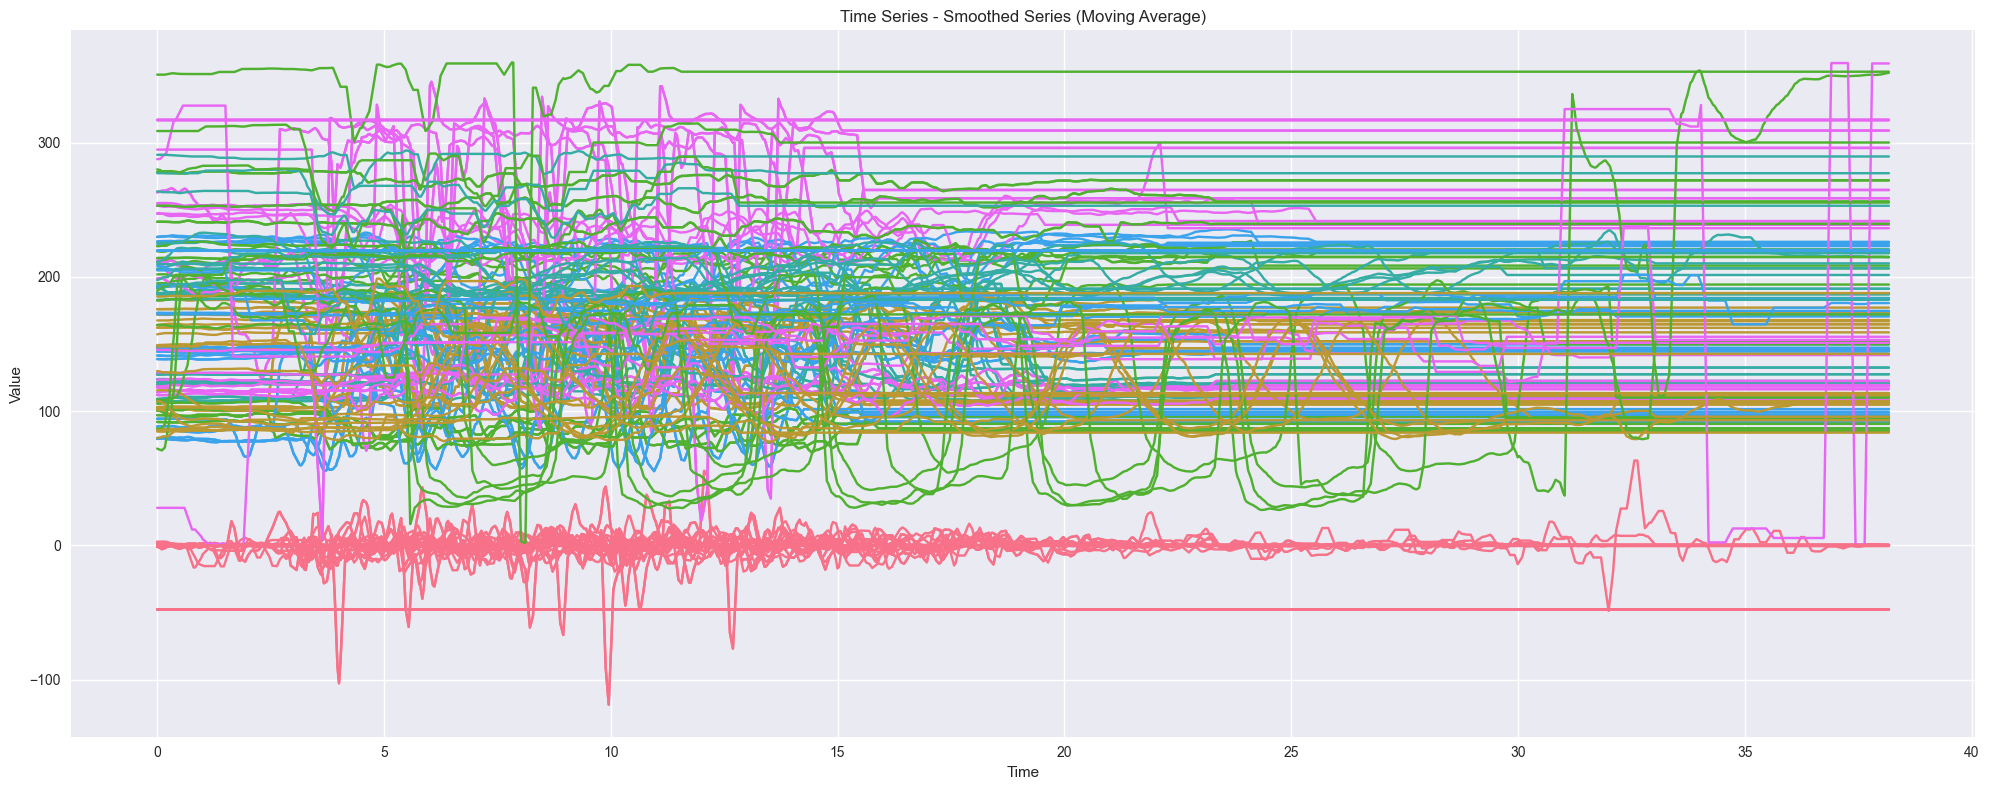

In [51]:
## visualização das séries suavizadas com média móvel
plt.figure(figsize=(20, 8))

# Select all columns except 'timestamp' from the smoothed DataFrame
smoothed_columns_to_plot = [col for col in df_smoothed.columns if col != 'timestamp']

for col in smoothed_columns_to_plot:
    plt.plot(df_smoothed['timestamp'], df_smoothed[col], label=col)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Smoothed Series (Moving Average)')
# plt.legend() # Uncomment to show legend if needed
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
"""
seguir o notebook de exemplo notebooks\Legacy\01_angulos_por_voluntario\04_Joelho_todos.ipynb

plot joelho com todos os voluntário e trials (cor por voluntário)
plot quadril com todos os voluntário e trials (cor por voluntário)
"""

'\nseguir o notebook de exemplo notebooks\\Legacy\x01_angulos_por_voluntario\x04_Joelho_todos.ipynb\n\nplot joelho com todos os voluntário e trials (cor por voluntário)\nplot quadril com todos os voluntário e trials (cor por voluntário)\n'

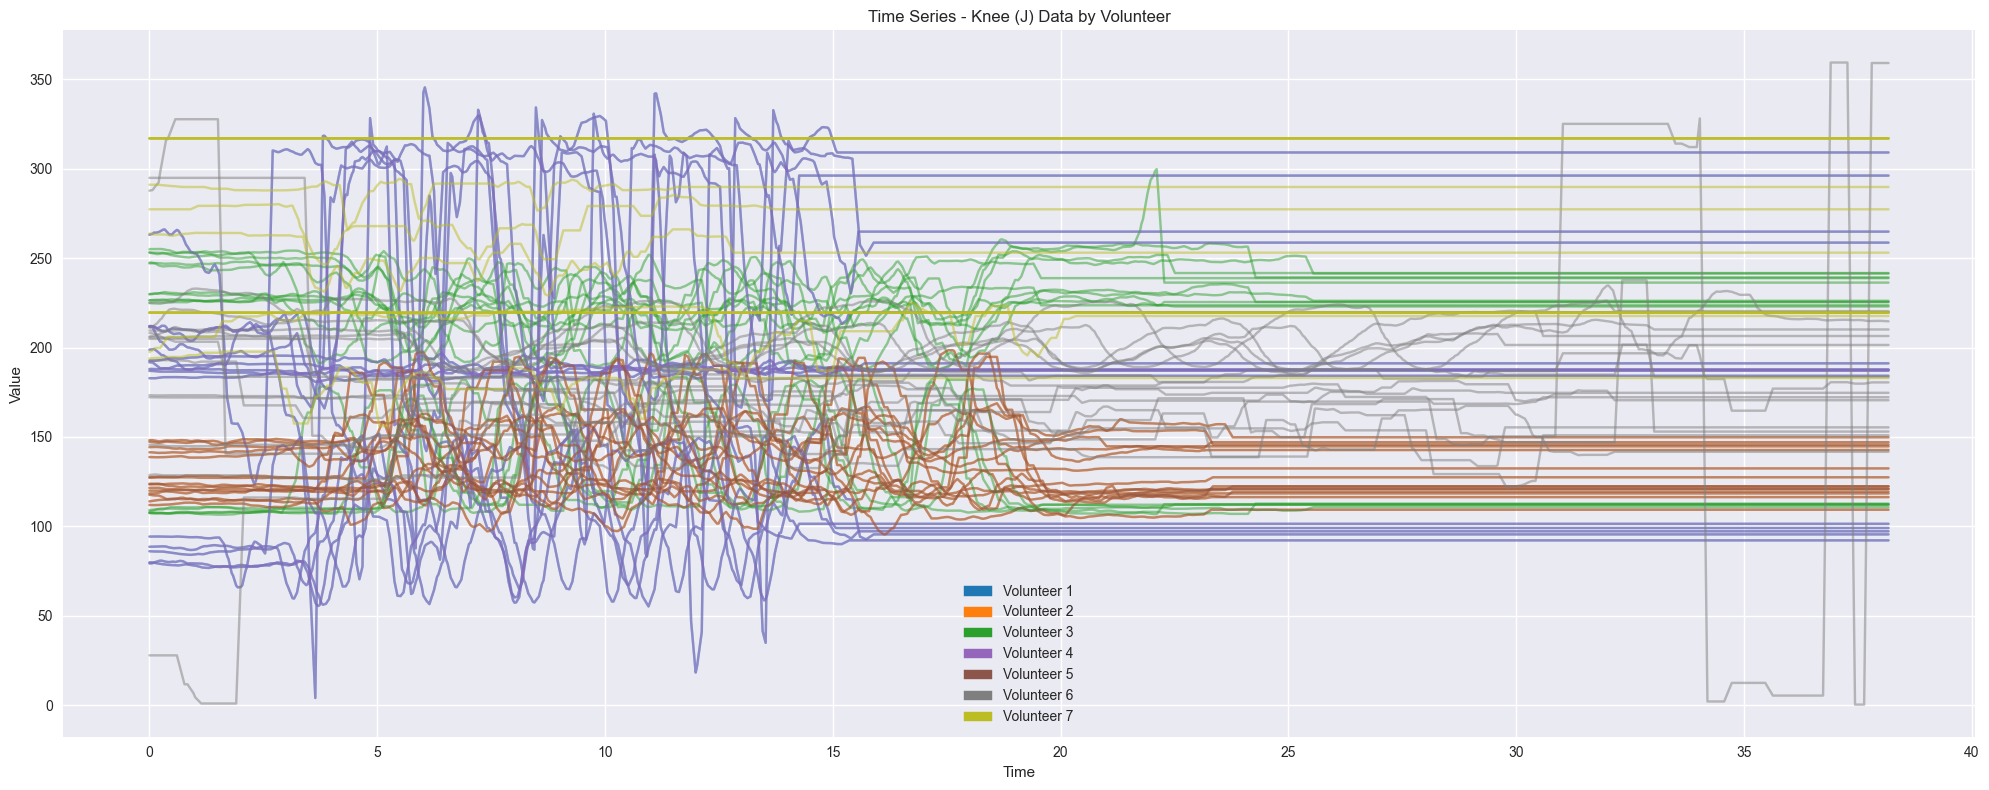

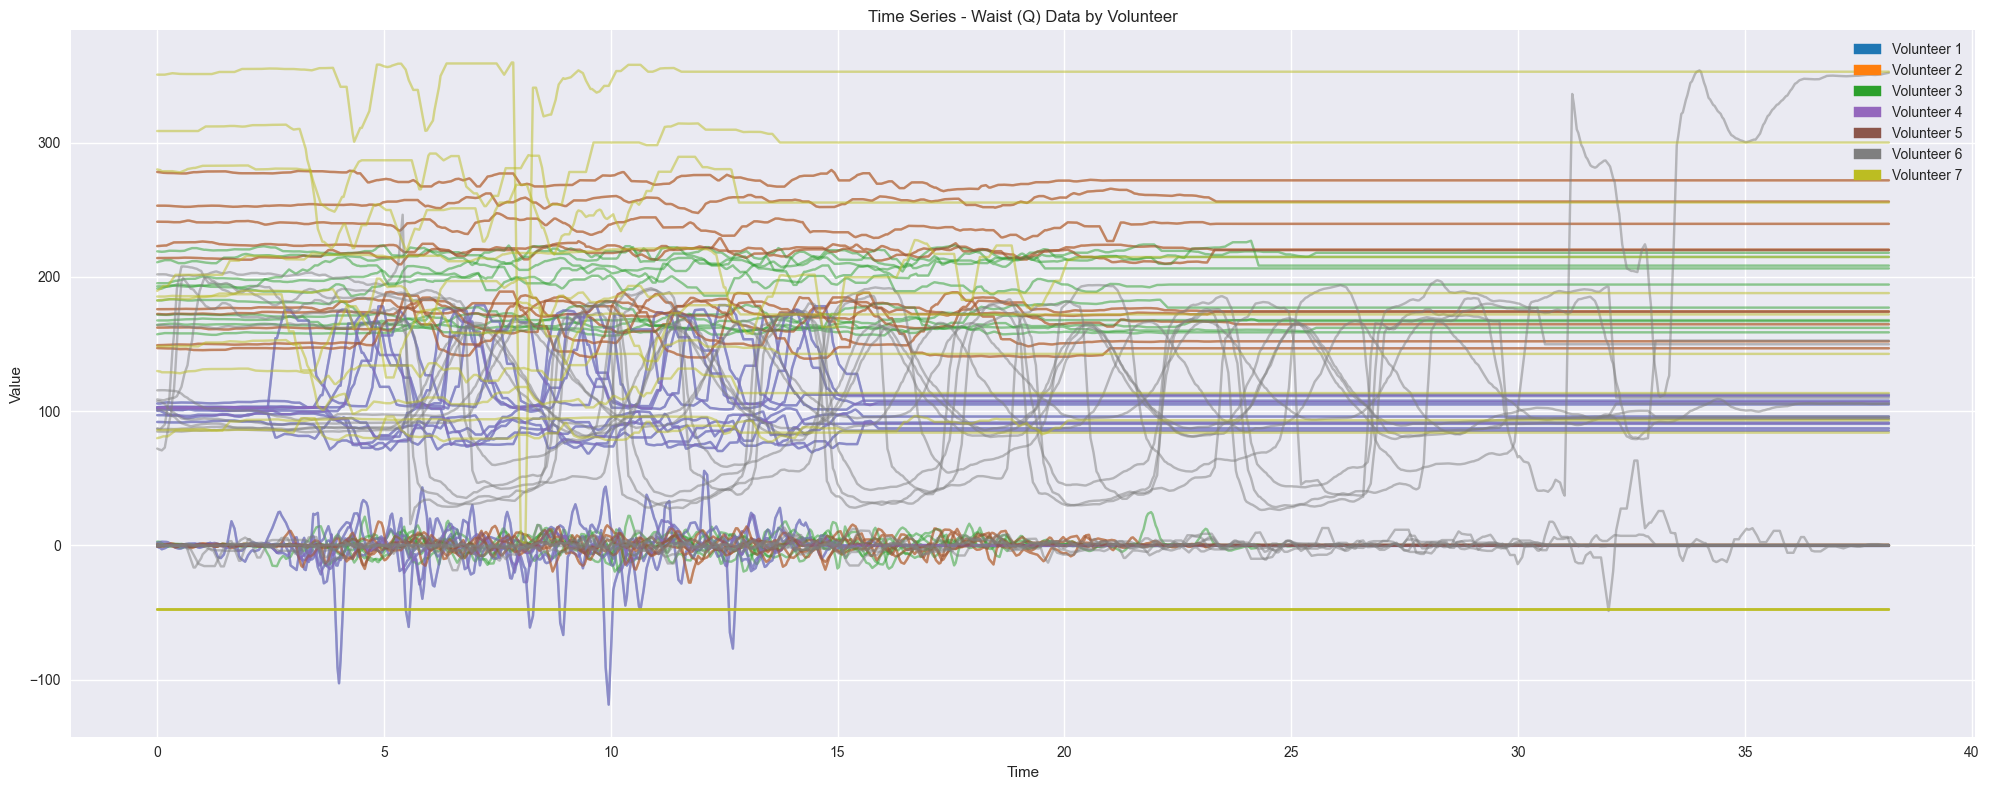

In [52]:
import matplotlib.patches as mpatches

## plot joelho com todos os voluntário e trials (cor por voluntário)
## plot quadril com todos os voluntário e trials (cor por voluntário)

# Get unique volunteer numbers from column names (assuming format vol[number]...)
volunteer_numbers = sorted(list(set([col.split('ex')[0][3:] for col in df.columns if 'vol' in col])))

# color_map para o plot
colors = plt.colormaps.get_cmap('tab10')
color_map = {vol_num: colors(i/len(volunteer_numbers)) for i, vol_num in enumerate(volunteer_numbers)}

# Plot Jxyz series (Knee)
plt.figure(figsize=(20, 8))
j_columns = [col for col in df.columns if '_j' in col.lower()]

# Create legend handles and labels for J series
legend_handles_j = []
legend_labels_j = []

for col in j_columns:
    vol_num = col.split('ex')[0][3:]
    if vol_num in color_map:
        plt.plot(df_smoothed['timestamp'], df_smoothed[col], color=color_map[vol_num], alpha=0.5) # Plot with some transparency
        if vol_num not in legend_labels_j:
            legend_handles_j.append(mpatches.Patch(color=color_map[vol_num], label=f'Volunteer {vol_num}'))
            legend_labels_j.append(vol_num)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Knee (J) Data by Volunteer')
plt.legend(handles=legend_handles_j) # Use custom legend handles
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Qxyz series (Waist)
plt.figure(figsize=(20, 8))
q_columns = [col for col in df.columns if '_q' in col.lower()]

# Create legend handles and labels for Q series
legend_handles_q = []
legend_labels_q = []

for col in q_columns:
    vol_num = col.split('ex')[0][3:]
    if vol_num in color_map:
        plt.plot(df_smoothed['timestamp'], df_smoothed[col], color=color_map[vol_num], alpha=0.5) # Plot with some transparency
        if vol_num not in legend_labels_q:
            legend_handles_q.append(mpatches.Patch(color=color_map[vol_num], label=f'Volunteer {vol_num}'))
            legend_labels_q.append(vol_num)


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Waist (Q) Data by Volunteer')
plt.legend(handles=legend_handles_q) # Use custom legend handles
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Clusterização hierárquica

In [11]:
"""
calcular uma matriz de distância entre as séries. Distâncias:
    - a distância vai ser: soma das distancias euclidiana das univariadas (dist joelho x + joelho y + joelho z + quadril x + quadril y + quadril z) 
        (entre duas trials, igualzinho o que vc já fez antes, só qeu agora considerando todas as variáveis (série temporal **multivariada**)
    - usa clusterização hierárquica aglomerativa (sklearn.cluster.AgglomerativeClustering)
    - escolhe um corte e visualiza os clusters
"""

'\ncalcular uma matriz de distância entre as séries. Distâncias:\n    - a distância vai ser: soma das distancias euclidiana das univariadas (dist joelho x + joelho y + joelho z + quadril x + quadril y + quadril z) \n        (entre duas trials, igualzinho o que vc já fez antes, só qeu agora considerando todas as variáveis (série temporal **multivariada**)\n    - usa clusterização hierárquica aglomerativa (sklearn.cluster.AgglomerativeClustering)\n    - escolhe um corte e visualiza os clusters\n'

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram, linkage
try:
    # Tentar usar df se existir
    if 'timestamp' in df.columns:
        data = df.drop(columns=["timestamp"]).values  # .values em vez de .to_numpy()
    else:
        data = df.values
    print(f"✅ Dados carregados: {data.shape}")
except NameError:
    # Se df não existir, criar dados de exemplo
    print("⚠️  DataFrame 'df' não encontrado...")

# ----- Calcular matriz de distância multivariada -----
print("🔄 Calculando matriz de distância multivariada...")
n = data.shape[0]
dist_matrix = np.zeros((n, n))

# Lógica para calcular distâncias
for i in range(n):
    if i % 10 == 0:
        progress = (i / n) * 100
        print(f"   Progresso: {progress:.1f}% ({i}/{n} amostras)")
    
    for j in range(i+1, n):
        dist = 0
        
        # OPÇÃO A: Se você quer agrupar as features em grupos de 6 (qx,qy,qz,jx,jy,jz)
        # e calcular distâncias para cada componente separadamente
        for k in range(0, data.shape[1], 6):
            # Verifica se ainda há pelo menos 6 features
            if k + 5 < data.shape[1]:
                # Distância para componentes q (quaternions): indices 0,1,2
                q_features_i = data[i, k:k+3]  # qx, qy, qz
                q_features_j = data[j, k:k+3]
                dist += euclidean(q_features_i, q_features_j)
                
                # Distância para componentes j (joints): indices 3,4,5
                j_features_i = data[i, k+3:k+6]  # jx, jy, jz
                j_features_j = data[j, k+3:k+6]
                dist += euclidean(j_features_i, j_features_j)
            else:
                # Para features restantes (se não completam um grupo de 6)
                remaining_features = data.shape[1] - k
                if remaining_features > 0:
                    remaining_i = data[i, k:k+remaining_features]
                    remaining_j = data[j, k:k+remaining_features]
                    dist += euclidean(remaining_i, remaining_j)
        
        # OPÇÃO B: Alternativa mais simples - distância euclidiana direta
        # dist = euclidean(data[i], data[j])
        
        dist_matrix[i, j] = dist_matrix[j, i] = dist

print("✅ Matriz de distância calculada!")

# Verificar se a matriz 
print(f"📊 Estatísticas da matriz de distância:")
print(f"   Min: {dist_matrix[dist_matrix > 0].min():.3f}")
print(f"   Max: {dist_matrix.max():.3f}")
print(f"   Média: {dist_matrix[dist_matrix > 0].mean():.3f}")

# ----- Clusterização Aglomerativa -----
print("🔗 Executando Clusterização Aglomerativa...")
n_clusters = 4  # definir número desejado
model = AgglomerativeClustering(
    n_clusters=n_clusters,  
    linkage='average'
)
labels = model.fit_predict(dist_matrix)

print(f"✅ Clustering concluído! {n_clusters} clusters identificados")

# ----- Visualizar Dendrograma -----
print("📊 Criando dendrograma...")
plt.figure(figsize=(12, 8))

# CORREÇÃO 5: Converter matriz quadrada para formato condensado
from scipy.spatial.distance import squareform
condensed_dist = squareform(dist_matrix, checks=False)
linked = linkage(condensed_dist, method='average')

dendrogram(linked, 
           truncate_mode='level',
           p=10,  # Mostrar apenas os últimos 10 níveis
           leaf_rotation=90,
           leaf_font_size=10)
plt.title("Dendrograma - Agglomerative Clustering\n(Distância Multivariada Customizada)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Índice da Amostra ou Tamanho do Cluster")
plt.ylabel("Distância")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ----- Análise dos Resultados -----
print("\n" + "="*60)
print("🔍 ANÁLISE DOS RESULTADOS")
print("="*60)

# Distribuição dos clusters
unique_labels, counts = np.unique(labels, return_counts=True)
print(f"\n📊 Distribuição dos Clusters:")
for cluster, count in zip(unique_labels, counts):
    percentage = (count / len(labels)) * 100
    print(f"   Cluster {cluster}: {count} amostras ({percentage:.1f}%)")

# Visualização da distribuição
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Cluster ID")
plt.ylabel("Número de Amostras")
plt.grid(True, alpha=0.3, axis='y')

# Adicionar rótulos nas barras
for i, (cluster, count) in enumerate(zip(unique_labels, counts)):
    plt.text(cluster, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


✅ Dados carregados: (1144, 210)
🔄 Calculando matriz de distância multivariada...
   Progresso: 0.0% (0/1144 amostras)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# ----- Carregar dados -----
# df = pd.read_csv("dados_tratados.csv")  # já tratado
# Excluir timestamp se existir
data = df.drop(columns=["timestamp"]).to_numpy()

# ----- Calcular matriz de distância multivariada -----
n = data.shape[0]
dist_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        # Soma das distâncias euclidianas nas 6 variáveis
        dist = 0
        for k in range(0, data.shape[1], 6):  
            dist += euclidean(data[i, k:k+6:3], data[j, k:k+6:3]) \
                  + euclidean(data[i, k+1:k+6:3], data[j, k+1:k+6:3]) \
                  + euclidean(data[i, k+2:k+6:3], data[j, k+2:k+6:3])
        dist_matrix[i, j] = dist_matrix[j, i] = dist

# ----- Clusterização Aglomerativa -----
n_clusters = 4  # definir número desejado
model = AgglomerativeClustering(
    n_clusters=n_clusters,
    affinity='precomputed',
    linkage='average'
)
labels = model.fit_predict(dist_matrix)

# ----- Visualizar Dendrograma -----
linked = linkage(dist_matrix, method='average')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrograma - Agglomerative Clustering")
plt.show()

# Labels finais
print("Clusters atribuídos:", labels)


KeyError: (0, slice(0, 6, 3))

In [ ]:
# Clusterização k-means DTW
"""
- para n_clusters em [2, 8]:
    - clusteriza com o DTW
    - calcula métricas (silhouette score, inertia)
- analiza regra do cotovelo e escolhe um número de clusters
- visualiza clusters
"""

'\n- para n_clusters em [2, 10]:\n    - clusteriza com o DTW\n    - calcula métricas (silhouette score, inertia)\n- analiza regra do cotovelo e escolhe um número de clusters\n- visualiza clusters\n'

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Prepare data for clustering
# Seleciona apenas as colunas de séries (exclui timestamp)
df_T = df.T
# séries temporais (linhas 1 a n)
series = df_T.iloc[1:].values

# Aplica o StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(series)
n_range = range(2, 7)
results = []

for k in n_range:
    km_dtw = TimeSeriesKMeans(
        n_clusters=k,
        metric="dtw",
        max_iter=50,
        random_state=42
    )
    labels = km_dtw.fit_predict(X_scaled)
    print(f"[Checkpoint] Clusterização para k={k} finalizada.")

    # Inertia vem direto do modelo
    inertia = km_dtw.inertia_
    
    # Silhouette Score precisa receber 2D array
    silhouette = silhouette_score(X_scaled, labels)

    results.append((k, inertia, silhouette))

# Salvar resultados em DataFrame
df_results = pd.DataFrame(results, columns=["n_clusters", "inertia", "silhouette"])
df_results


[Checkpoint] Clusterização para k=2 finalizada.
[Checkpoint] Clusterização para k=3 finalizada.


n_clusters     inertia  silhouette
0           2  208.741208    0.523711
1           3   69.525038    0.579382

In [ ]:
# Clusterização k-means CTW
"""
- para n_clusters em [2, 8]:
    - clusteriza com o CTW
    - calcula métricas (silhouette score, inertia)
- analiza regra do cotovelo e escolhe um número de clusters
- visualiza clusters
"""

'\n- para n_clusters em [2, 10]:\n    - clusteriza com o CTW\n    - calcula métricas (silhouette score, inertia)\n- analiza regra do cotovelo e escolhe um número de clusters\n- visualiza clusters\n'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from tslearn.clustering import KMeans
from ctw import CanonicalTimeWarping  # pip install ctw


# Prepare data for clustering
# Seleciona apenas as colunas de séries (exclui timestamp)
df_T = df.T
# séries temporais (linhas 1 a n)
series = df_T.iloc[1:].values

# Aplica o StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(series)

# Ajustar para formato (n_amostras, comprimento, n_features)
n_features = 6  # joelho x,y,z + quadril x,y,z
length = X_raw.shape[1] // n_features
X_series = X_raw.reshape(X_raw.shape[0], length, n_features)

# Escalonar
scaler = StandardScaler()
X_scaled = np.empty_like(X_series)
for f in range(n_features):
    X_scaled[:,:,f] = scaler.fit_transform(X_series[:,:,f])

# --- Calcular matriz de distâncias CTW ---
n_samples = X_scaled.shape[0]
dist_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(i+1, n_samples):
        ctw = CanonicalTimeWarping()
        ctw.fit(X_scaled[i], X_scaled[j])
        dist = ctw.distance(X_scaled[i], X_scaled[j])
        dist_matrix[i, j] = dist_matrix[j, i] = dist

# --- Converter distâncias para embedding MDS ---
embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_embedded = embedding.fit_transform(dist_matrix)

# --- Avaliar K-Means para k em [2, 10] ---
n_range = range(2, 8)
results = []

for k in n_range:
    km_ctw = KMeans(n_clusters=k, random_state=42)
    labels = km_ctw.fit_predict(X_embedded)
    inertia = km_ctw.inertia_
    sil = silhouette_score(X_embedded, labels)
    results.append((k, inertia, sil))

# --- Resultados ---
df_results = pd.DataFrame(results, columns=["n_clusters", "inertia", "silhouette"])
df_results


In [14]:
# Análise dos resultados
"""
Compara o que vc obteve com 3 métodos acima.
"""

"""
Hipótese: Clusterizar séries temporais é útil para detectar padrões de compensação de movimento nos dados do BSN?
Pra responder:
- experimento comparando métodos de clusterização para encontrar o melhor deles.
- **analisar se a clusterização foi de fato útil ou não**.
"""

'\nHipótese: Clusterizar séries temporais é útil para detectar padrões de compensação de movimento nos dados do BSN?\nPra responder:\n- experimento comparando métodos de clusterização para encontrar o melhor deles.\n- **analisar se a clusterização foi de fato útil ou não**.\n'

## Analise da Aglomerative Clustering

## Analise da Clusterização do DTW

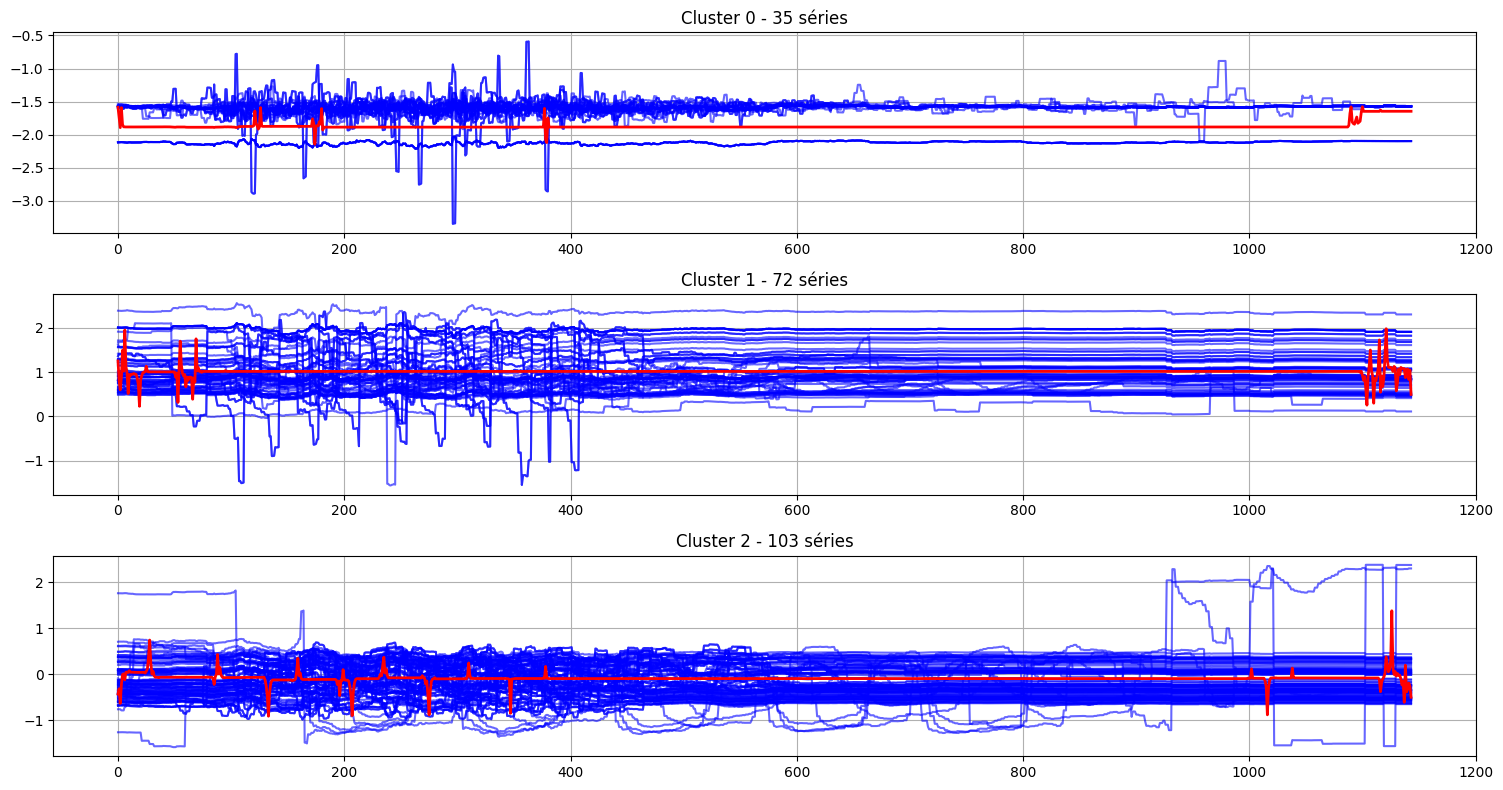

In [ ]:
#usar esse código apos eu realizar a clusterização com mais clusters e ter as métricas para selecioanar o melhor n_clusters
labels = km_dtw.labels_
n_clusters = km_dtw.n_clusters

plt.figure(figsize=(15, 8))
for cluster_id in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster_id + 1)
    
    # Seleciona todas as séries do cluster atual
    cluster_series = X_scaled[labels == cluster_id]
    
    # Plota todas as séries em cinza claro
    for serie in cluster_series:
        plt.plot(serie, color="blue", alpha=0.6)
    
    # Plota o centróide do cluster em destaque
    plt.plot(km_dtw.cluster_centers_[cluster_id].ravel(), color="red", linewidth=2)
    
    plt.title(f"Cluster {cluster_id} - {cluster_series.shape[0]} séries")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
# Conclusão